Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from itertools import groupby
from statsmodels.distributions.empirical_distribution import ECDF

Set numbers which will be used<br/>
$n$ = number of flips<br/>
$k$ = number with which maximum length of run will be compared

In [2]:
n = 50
k = 12

Function to count probabilities of $M_i \le k$ for $1 \le i \le n$

In [3]:
def prob(n, k):
    m = [2]
    m += [1 for _ in range(k)]
    m += [0 for _ in range(n - k)]

    def recurse(i, k):
            if m[i]:
                return m[i]
            else:
                m[i] = recurse(i - 1, k) - recurse(i - k - 1, k)/2**(k + 1)
                return m[i]

    recurse(n, k)
    return m

Function to count probabilities of $M_i \le j$ for $1 \le i \le n$ and $1 \le j \le k$ using previous function

In [4]:
def probs(n, k):
    t = [[] for _ in range(n + 1)]
    
    for i in range(1, k + 1):
        m = prob(n, i)
        for p in range(n + 1):
            t[p].append(m[p])

    return t

And generate table from result

In [5]:
def format_matrix(t, n):
    result_matrix = '  n\\k' + ''.join(['%10d' % _ for _ in range(1, k + 1)]) + '\n\n'
    
    for row in t:
        result_matrix += '  ' \
        + '%3d' % t.index(row) \
        + ''.join([('%10d' % p) if type(p) == int else ('%10.5f' % float(p)) for p in row]) + '\n'
    
    return result_matrix
    

In [6]:
result = probs(n, k)
print(format_matrix(result, n))

  n\k         1         2         3         4         5         6         7         8         9        10        11        12

    0         2         2         2         2         2         2         2         2         2         2         2         2
    1         1         1         1         1         1         1         1         1         1         1         1         1
    2   0.50000         1         1         1         1         1         1         1         1         1         1         1
    3   0.25000   0.75000         1         1         1         1         1         1         1         1         1         1
    4   0.12500   0.62500   0.87500         1         1         1         1         1         1         1         1         1
    5   0.06250   0.50000   0.81250   0.93750         1         1         1         1         1         1         1         1
    6   0.03125   0.40625   0.75000   0.90625   0.96875         1         1         1         1         1         1  

Generate sequence with length $n$ taking values from $\{0, 1\}$ randomly

In [7]:
def generate_sequence(n):
    
    xk = [0, 1]
    pk = (0.5, 0.5)
    x_seq = stats.rv_discrete(values=(xk, pk))

    return x_seq.rvs(size=n)

Count lengths of run and save results as list (of lengths of runs)

In [8]:
def simulation(n):

    flips = generate_sequence(n)
    print('flips\n', flips)

    return [len(list(group)) for key, group in groupby(flips)]


Function to calculate $pdf$ for received list of runs' lengths

In [9]:
def calculate_pdf(runs):
    n = len(runs)
    return sorted({key: runs.count(key)/n for key in runs}.items())

Function to calculate $cdf$ for received list of runs' lengths

In [10]:
def calculate_cdf(pdf):
    cdf = []
    for p in range(len(pdf)):
        cdf.append([pdf[p][0], pdf[p][1]])
        for i in range(p):
            cdf[p][1] += pdf[i][1]
    return cdf

Run simulation

In [11]:
runs = simulation(50)
print('runs\n', runs)

flips
 [0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 0 1 0]
runs
 [1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 7, 2, 3, 1, 3, 4, 1, 1, 1, 3, 1, 2, 1, 1, 1]


Calculate $ecdf$

In [24]:
ecdf = ECDF(runs)
ecdf_dict = {key: round(value, 6) for key, value in zip(ecdf.x, ecdf.y)}
ecdf_for_print = '\n'.join('%f: %.6f' % (key, ecdf_dict[key]) for key in ecdf_dict)
print(ecdf_for_print)

-inf: 0.000000
1.000000: 0.620690
2.000000: 0.827586
3.000000: 0.931034
4.000000: 0.965517
7.000000: 1.000000


and build plot of it

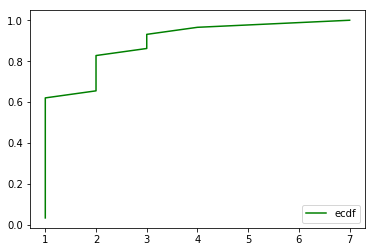

In [13]:
plt.plot(ecdf.x, ecdf.y, '-g', label='ecdf')
plt.legend(loc='lower right')

Then $pdf$ ...

In [25]:
pdf = calculate_pdf(runs)
print('\n'.join(['%d: %.6f' % (p[0], p[1]) for p in pdf]))

1: 0.620690
2: 0.206897
3: 0.103448
4: 0.034483
7: 0.034483


and $cdf$ ...

In [26]:
cdf = calculate_cdf(pdf)
print('\n'.join(['%d: %.6f' % (c[0], c[1]) for c in cdf]))

1: 0.620690
2: 0.827586
3: 0.931034
4: 0.965517
7: 1.000000


and their plots

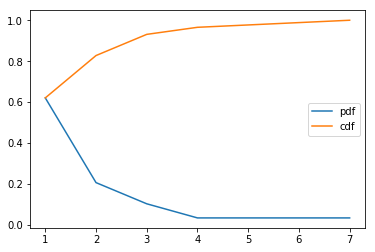

In [16]:
plt.plot([d[0] for d in pdf], [d[1] for d in pdf], label='pdf')
plt.plot([d[0] for d in cdf], [d[1] for d in cdf], label='cdf')
plt.legend(loc='right')